In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Datasets/dataset.csv")
df.head()

,Transaction ID,Type,Branch,Amount,Name Origin,Old Balance Origin,New Balance Origin,Name Destination,Old Balance Destination,New Balance Destination,Unusual Logins,Account Age,isFlaggedFraud,Account Type,Date of Transaction,Time of Day,isFraud
0,TRX1144501074,PAYMENT,Australia,936.44,C1209972485,18289.00,17352.56,M719383448,866907.0,867843.44,16,6.158325,0,Savings,07-01-2018,Afternoon,0
1,TRX4316322708,PAYMENT,Pakistan,760.21,C288919635,1330599.59,1329839.38,M1572442646,985674.0,986434.21,8,8.732974,0,Savings,06-01-2018,Afternoon,0
2,TRX6712527036,PAYMENT,Paises Bajos,8358.12,C1542598424,18170.00,9811.88,M645875534,1345930.0,1354288.12,16,6.777901,0,Savings,12-01-2018,Morning,0
3,TRX5508871317,CASH_OUT,Canada,227897.04,C97755704,1722408.00,1494510.96,C97755704,0.0,0.00,9,4.061835,0,Savings,25-01-2018,Night,0
4,TRX6296354274,PAYMENT,Estados Unidos,68.09,C1265189536,28785.00,28716.91,M1684281752,1171407.0,1171475.09,6,8.323809,0,Current,08-01-2018,Afternoon,0


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10085
Number of columns: 17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10085 entries, 0 to 10084
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction ID           10085 non-null  object 
 1   Type                     10084 non-null  object 
 2   Branch                   10085 non-null  object 
 3   Amount                   10085 non-null  float64
 4   Name Origin              10085 non-null  object 
 5   Old Balance Origin       10085 non-null  float64
 6   New Balance Origin       10085 non-null  float64
 7   Name Destination         10085 non-null  object 
 8   Old Balance Destination  10085 non-null  float64
 9   New Balance Destination  10085 non-null  float64
 10  Unusual Logins           10085 non-null  int64  
 11  Account Age              10084 non-null  float64
 12  isFlaggedFraud           10085 non-null  int64  
 13  Account Type             10085 non-null  object 
 14  Date of Transaction   

In [5]:
df.drop(columns=["Transaction ID", "isFlaggedFraud"], inplace=True)

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)

In [7]:
df.describe()

,Amount,Old Balance Origin,New Balance Origin,Old Balance Destination,New Balance Destination,Unusual Logins,Account Age,isFraud
count,10085.00,10085.00,10085.00,10085.00,10085.00,10085.00,10084.00,10085.00
mean,105006.41,1196780.81,1159549.20,803114.92,858855.10,10.51,4.52,0.05
std,271040.19,2085095.26,2129248.28,1518584.81,1664942.12,5.81,2.61,0.23
min,2.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4397.38,20732.74,13675.89,0.00,0.00,6.00,2.25,0.00
50%,12827.97,181083.00,137530.43,370583.00,423787.15,10.00,4.53,0.00
75%,114384.61,1467075.85,1296774.87,1237001.00,1266543.15,16.00,6.80,0.00
max,10000000.00,12900000.00,12981126.42,19400000.00,20943845.35,20.00,9.00,1.00


In [8]:
df.describe(include="object")

,Type,Branch,Name Origin,Name Destination,Account Type,Date of Transaction,Time of Day
count,10084,10085,10085,10085,10085,10085,10085
unique,5,134,10085,9382,2,14,3
top,PAYMENT,Estados Unidos,C1209972485,C985934102,Savings,06-01-2018,Afternoon
freq,5520,1277,1,15,6970,1442,3612


# Removing duplicates

In [9]:
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 10085


# Null values

In [10]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


Type                       1
Branch                     0
Amount                     0
Name Origin                0
Old Balance Origin         0
New Balance Origin         0
Name Destination           0
Old Balance Destination    0
New Balance Destination    0
Unusual Logins             0
Account Age                1
Account Type               0
Date of Transaction        0
Time of Day                0
isFraud                    0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


Type                       0
Branch                     0
Amount                     0
Name Origin                0
Old Balance Origin         0
New Balance Origin         0
Name Destination           0
Old Balance Destination    0
New Balance Destination    0
Unusual Logins             0
Account Age                0
Account Type               0
Date of Transaction        0
Time of Day                0
isFraud                    0
dtype: int64

In [13]:
print("Number of rows:", df.shape[0])

Number of rows: 10083


# Account holder's Names

In [14]:
df.head()

,Type,Branch,Amount,Name Origin,Old Balance Origin,New Balance Origin,Name Destination,Old Balance Destination,New Balance Destination,Unusual Logins,Account Age,Account Type,Date of Transaction,Time of Day,isFraud
0,PAYMENT,Australia,936.44,C1209972485,18289.00,17352.56,M719383448,866907.00,867843.44,16,6.16,Savings,07-01-2018,Afternoon,0
1,PAYMENT,Pakistan,760.21,C288919635,1330599.59,1329839.38,M1572442646,985674.00,986434.21,8,8.73,Savings,06-01-2018,Afternoon,0
2,PAYMENT,Paises Bajos,8358.12,C1542598424,18170.00,9811.88,M645875534,1345930.00,1354288.12,16,6.78,Savings,12-01-2018,Morning,0
3,CASH_OUT,Canada,227897.04,C97755704,1722408.00,1494510.96,C97755704,0.00,0.00,9,4.06,Savings,25-01-2018,Night,0
4,PAYMENT,Estados Unidos,68.09,C1265189536,28785.00,28716.91,M1684281752,1171407.00,1171475.09,6,8.32,Current,08-01-2018,Afternoon,0


In [15]:
df['Receiver'] = 'Customer'
df.loc[df['Name Destination'].str.contains('M'), 'Receiver'] = 'Merchant'
df.loc[df['Name Destination'].str.contains('C'), 'Receiver'] = 'Customer'
df.loc[df['Name Origin'] == df['Name Destination'], 'Receiver'] = 'Self'

In [16]:
col = df.pop('Receiver')
df.insert(9, 'Receiver', col)

In [17]:
df.head()

,Type,Branch,Amount,Name Origin,Old Balance Origin,New Balance Origin,Name Destination,Old Balance Destination,New Balance Destination,Receiver,Unusual Logins,Account Age,Account Type,Date of Transaction,Time of Day,isFraud
0,PAYMENT,Australia,936.44,C1209972485,18289.00,17352.56,M719383448,866907.00,867843.44,Merchant,16,6.16,Savings,07-01-2018,Afternoon,0
1,PAYMENT,Pakistan,760.21,C288919635,1330599.59,1329839.38,M1572442646,985674.00,986434.21,Merchant,8,8.73,Savings,06-01-2018,Afternoon,0
2,PAYMENT,Paises Bajos,8358.12,C1542598424,18170.00,9811.88,M645875534,1345930.00,1354288.12,Merchant,16,6.78,Savings,12-01-2018,Morning,0
3,CASH_OUT,Canada,227897.04,C97755704,1722408.00,1494510.96,C97755704,0.00,0.00,Self,9,4.06,Savings,25-01-2018,Night,0
4,PAYMENT,Estados Unidos,68.09,C1265189536,28785.00,28716.91,M1684281752,1171407.00,1171475.09,Merchant,6,8.32,Current,08-01-2018,Afternoon,0


# Unique values

In [18]:
print("Number of unique values in each column:")
df.nunique()

Number of unique values in each column:


Type                           5
Branch                       134
Amount                     10037
Name Origin                10083
Old Balance Origin          9702
New Balance Origin          9800
Name Destination            9381
Old Balance Destination     6464
New Balance Destination     6600
Receiver                       3
Unusual Logins                21
Account Age                10083
Account Type                   2
Date of Transaction           14
Time of Day                    3
isFraud                        2
dtype: int64

In [19]:
df.drop(columns=["Date of Transaction","Name Origin", 'Name Destination'], inplace=True)

# Data Visualizations

In [20]:
fraud_count = df["isFraud"].value_counts()
fraud_count

0    9538
1     545
Name: isFraud, dtype: int64

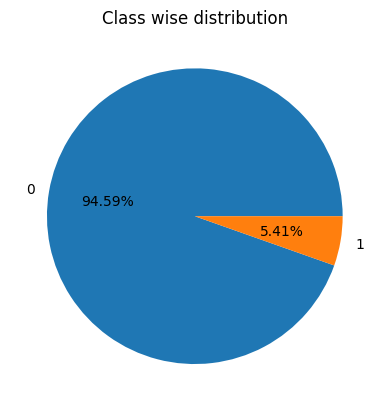

In [21]:
plt.pie(fraud_count, labels=fraud_count.keys(), autopct="%.2f%%")
plt.title("Class wise distribution")
plt.show()

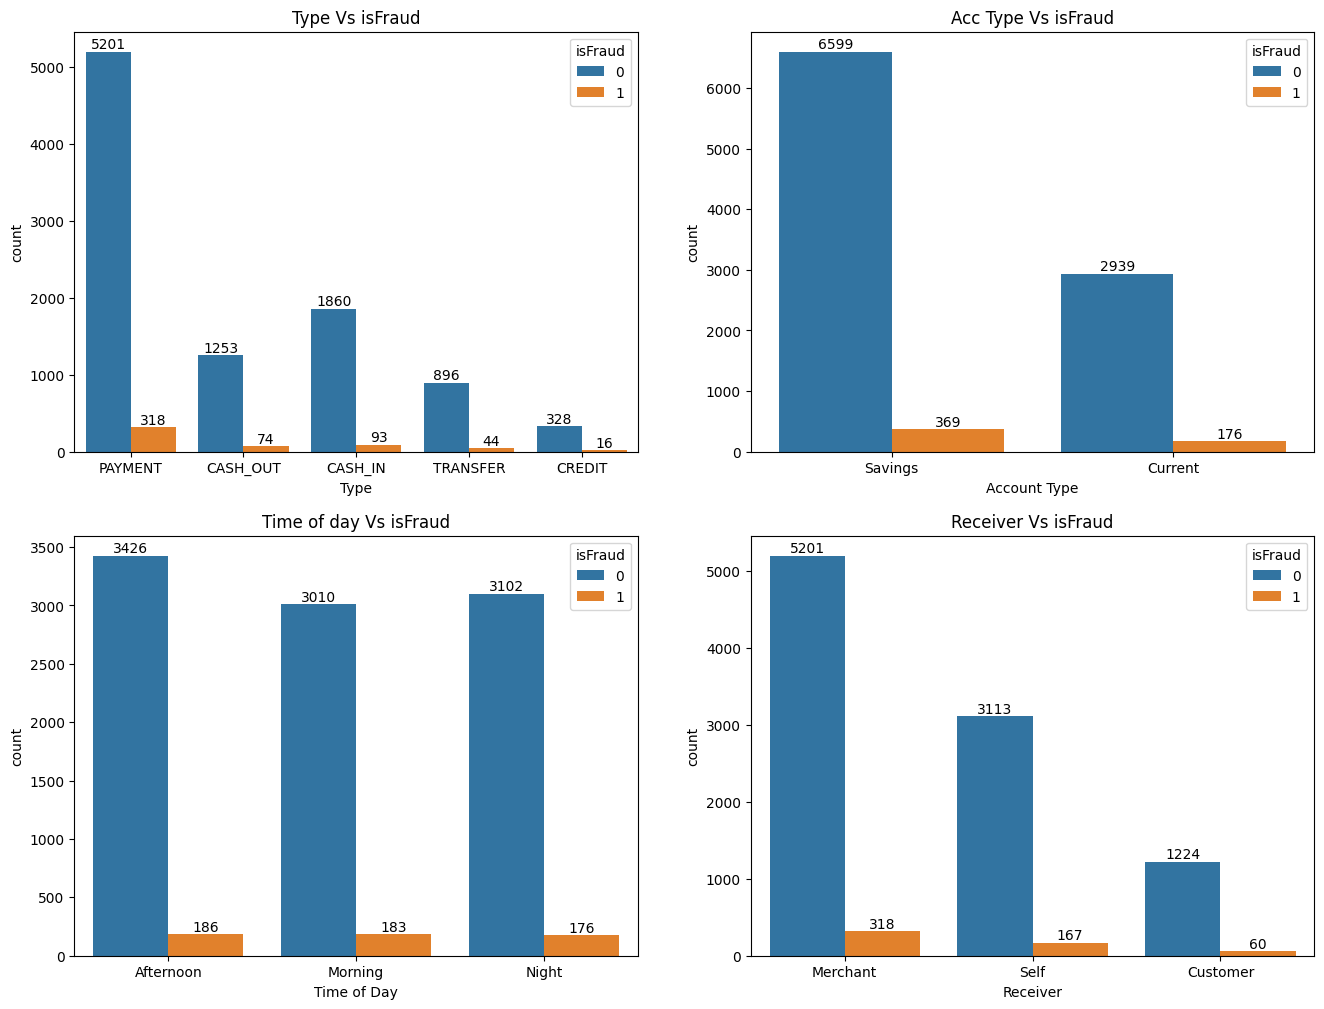

In [22]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))

ax = sns.countplot(data=df, x='Type',hue='isFraud', ax=axes[0][0])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[0][0].set_title('Type Vs isFraud')

ax = sns.countplot(data=df, x='Account Type',hue='isFraud', ax=axes[0][1])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[0][1].set_title('Acc Type Vs isFraud')

ax = sns.countplot(data=df, x='Time of Day',hue='isFraud', ax=axes[1][0])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[1][0].set_title('Time of day Vs isFraud')

ax = sns.countplot(data=df, x='Receiver',hue='isFraud', ax=axes[1][1])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[1][1].set_title('Receiver Vs isFraud')

plt.show()

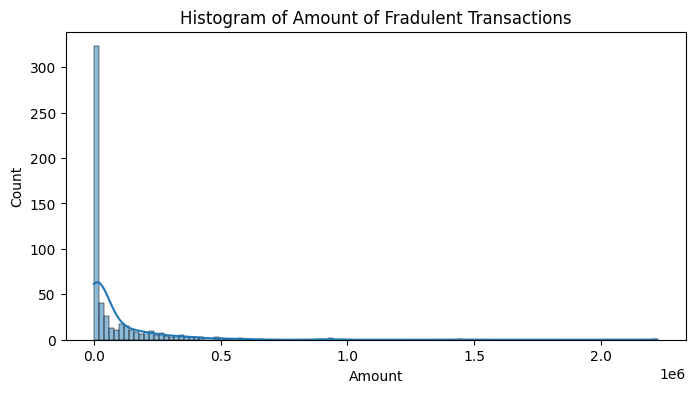

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data=df[df['isFraud']==1],x='Amount',kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show()

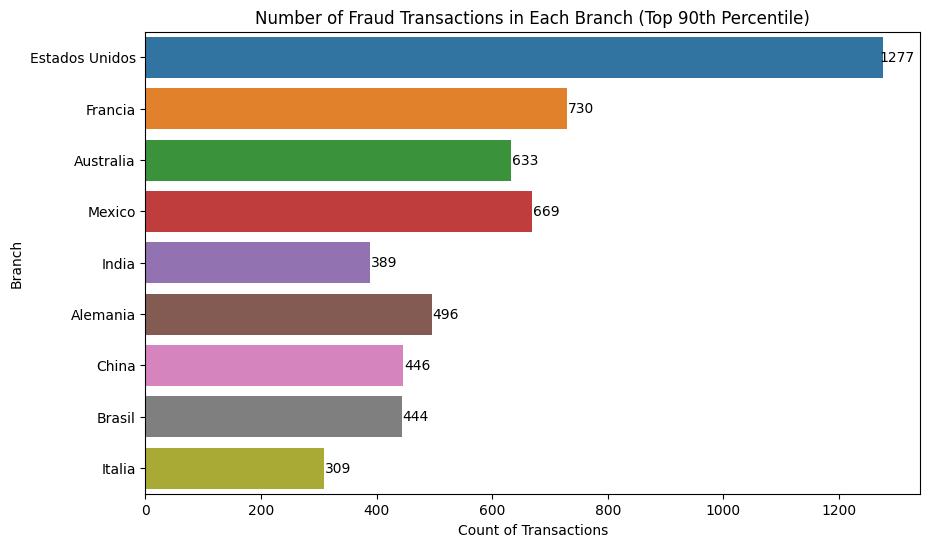

In [24]:
branch_counts = df[df['isFraud'] == 1]['Branch'].value_counts()
threshold = branch_counts.quantile(0.9)
top_branches = branch_counts[branch_counts >= threshold].index.tolist()
df_top = df[df['Branch'].isin(top_branches)]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_top, y='Branch', orient='horizontal', order=top_branches)
plt.title('Number of Fraud Transactions in Each Branch (Top 90th Percentile)')
plt.xlabel('Count of Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

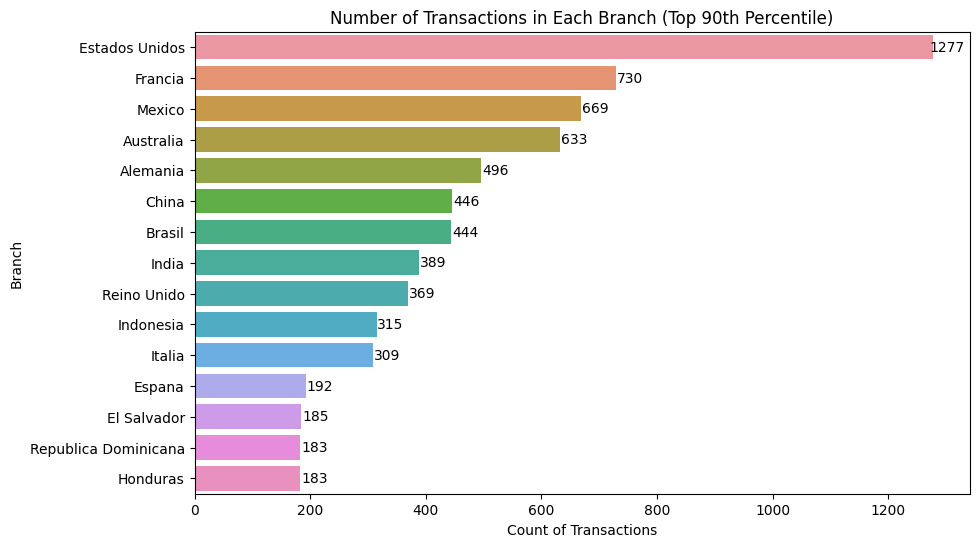

In [25]:
branch_counts = df['Branch'].value_counts()
threshold = branch_counts.quantile(0.9)
top_branches = branch_counts[branch_counts >= threshold].index.tolist()
df_top = df[df['Branch'].isin(top_branches)]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_top, y='Branch', orient='horizontal', order=top_branches)
plt.title('Number of Transactions in Each Branch (Top 90th Percentile)')
plt.xlabel('Count of Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

In [26]:
df.to_csv("Datasets/cleaned_data.csv", index=False)